In [ ]:
 # Environment setup and Log in to Twitter

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

ModuleNotFoundError: ignored

In [ ]:
my_user = "LEVIBAHATI1"
my_pass = getpass.getpass()
#my_pass = "@Bahati_12345"

········


In [ ]:
search_item = "Huduma Kenya"

In [ ]:
PATH = "C:\Program Files\drivers\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get("https://twitter.com/i/flow/login")
driver.maximize_window()
sleep(3)

C:\Users\Bahati\AppData\Local\Temp\ipykernel_4116\2853509174.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [ ]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [ ]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [ ]:
# Scrape Tweets mentioning Huduma Kenya

In [ ]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)


In [ ]:
# iterating through the first 50 tweets

In [ ]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [ ]:
# displaying the first tweet

In [ ]:
all_tweets = list(all_tweets)
all_tweets[0]

'@HudumaKenya\n Hey please assist  I applied birthcertificate on 8th September 2022 ..at Huduma GPO  Ref CAECB_AACIRK7'

In [ ]:
# Cleaning the Tweets

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bahati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bahati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
stp_words = stopwords.words('english')
print(stp_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,@HudumaKenya\n Hey please assist I applied birthcertificate on 8th September 2022 ..at Huduma GPO Ref CAECB_AACIRK7
1,I can one get a job at huduma Kenya with a bachelor of commerce... finance options
2,Congratulations are in order for your nomination ... now work and fix \n@ntsa_kenya\n system failure that has been on for 3 months now no Dl printing going on at the huduma centre no finger print and passport appointment going on completely dissapointing
3,Hello. Kindly visit the centre to replace your ID as the system has been restored. You will be issued with a police abstract then pay Ksh.100 at the KCB Agent within the centre before replacing the ID which will take 2 weeks to be processed. ^SM
4,Hello \n@MusyokaBenjam13\n. Kindly visit http://confirmation.hudumanamba.go.ke to check your Huduma Namba status. ^SM


In [ ]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'Hello \n@MusyokaBenjam13\n. Kindly visit http://confirmation.hudumanamba.go.ke to check your Huduma Namba status. ^SM'

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"



In [ ]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,@HudumaKenya\n Hey please assist I applied birthcertificate on 8th September 2022 ..at Huduma GPO Ref CAECB_AACIRK7,Hey please assist I applied birthcertificate 8th September 2022 ..at Huduma GPO Ref CAECB_AACIRK7,0.000000,0.00,neutral
1,I can one get a job at huduma Kenya with a bachelor of commerce... finance options,I one get job huduma Kenya bachelor commerce... finance options,0.000000,0.00,neutral
2,Congratulations are in order for your nomination ... now work and fix \n@ntsa_kenya\n system failure that has been on for 3 months now no Dl printing going on at the huduma centre no finger print and passport appointment going on completely dissapointing,Congratulations order nomination ... work fix _kenya system failure 3 months Dl printing going huduma centre finger print passport appointment going completely dissapointing,-0.108333,0.35,negative
3,Hello. Kindly visit the centre to replace your ID as the system has been restored. You will be issued with a police abstract then pay Ksh.100 at the KCB Agent within the centre before replacing the ID which will take 2 weeks to be processed. ^SM,Hello. Kindly visit centre replace ID system restored. You issued police abstract pay Ksh.100 KCB Agent within centre replacing ID take 2 weeks processed. ^SM,0.600000,0.90,positive
4,Hello \n@MusyokaBenjam13\n. Kindly visit http://confirmation.hudumanamba.go.ke to check your Huduma Namba status. ^SM,Hello . Kindly visit http://confirmation.hudumanamba.go.ke check Huduma Namba status. ^SM,0.600000,0.90,positive


In [ ]:
# Analysis and Visualization

In [ ]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})


,segmentation
segmentation,
negative,9
neutral,19
positive,26


In [ ]:
# top 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)


,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
27,Government will add 100 Huduma centres across the country to bring services closer to citizens Proudly Kenyan. #kenyaat59,Government add 100 Huduma centres across country bring services closer citizens Proudly Kenyan.,0.8,1.0,positive
46,Kindly check dm,Kindly check dm,0.6,0.9,positive
3,Hello. Kindly visit the centre to replace your ID as the system has been restored. You will be issued with a police abstract then pay Ksh.100 at the KCB Agent within the centre before replacing the ID which will take 2 weeks to be processed. ^SM,Hello. Kindly visit centre replace ID system restored. You issued police abstract pay Ksh.100 KCB Agent within centre replacing ID take 2 weeks processed. ^SM,0.6,0.9,positive


In [ ]:
# top 3 most negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)



,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
33,Today was the worst day to experience blackout. Friday? Hatujaona ball sigh.. Outrage from 4 pm till now... I have dmd & also,Today worst day experience blackout. Friday? Hatujaona ball sigh.. Outrage 4 pm till now... I dmd & also,-1.000000,1.000000,negative
6,"@ntsa_kenya\n bwana what is wrong with the TIMS I.D serial verification process, been trying it all week, took time out to go to huduma queue for hours and still leave without a definitive answer or solution!!! What's the problem","_kenya bwana wrong TIMS I.D serial verification process, trying week, took time go huduma queue hours still leave without definitive answer solution!!! What's problem",-0.976562,0.900000,negative
35,"1/2 On 31st October 2022, Cabinet Secretary \n@CSAishaJumwa\n committed to extend the working hours in select \n@HudumaKenya\n Centers across the country. Beginning today, 18 Huduma Centers will operate from 7am to 7pm from the previous 8am to 5pm.","1/2 On 31st October 2022, Cabinet Secretary committed extend working hours select Centers across country. Beginning today, 18 Huduma Centers operate 7am 7pm previous 8am 5pm.",-0.166667,0.166667,negative


In [ ]:
# 3 neutral
df[df.tPolarity==0]

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,@HudumaKenya\n Hey please assist I applied birthcertificate on 8th September 2022 ..at Huduma GPO Ref CAECB_AACIRK7,Hey please assist I applied birthcertificate 8th September 2022 ..at Huduma GPO Ref CAECB_AACIRK7,0.0,0.000000,neutral
1,I can one get a job at huduma Kenya with a bachelor of commerce... finance options,I one get job huduma Kenya bachelor commerce... finance options,0.0,0.000000,neutral
10,"Charlene Ruto kalonzo Swahili huduma male\nwe recommend LONGJACK to men who want to enlarge their penis or have erectile problems.\nIt doesn't involve any of the risks associated with surgery, yet its effects in lengthening and delaying ejaculation are very satisfactory.0796421454","Charlene Ruto kalonzo Swahili huduma male recommend LONGJACK men want enlarge penis erectile problems. It involve risks associated surgery, yet effects lengthening delaying ejaculation satisfactory.0796421454",0.0,0.100000,neutral
12,"Select Huduma Centers to operate from 7 am to 7 pm starting tomorrow, December 5","Select Huduma Centers operate 7 7 pm starting tomorrow, December 5",0.0,0.100000,neutral
13,Piga luku kula wa anjapi\nDelivery to your doorstep is instant \nCall or WhatsApp 0705996736\nSneakers ksh3999\nJeans n tees ksh1850 each\nCharlene Ruto Mark Masai \nNdii Male Huduma Martial Moroccans,Piga luku kula wa anjapi Delivery doorstep instant Call WhatsApp 0705996736 Sneakers ksh3999 Jeans n tees ksh1850 Charlene Ruto Mark Masai Ndii Male Huduma Martial Moroccans,0.0,0.255556,neutral
21,"So systems \n@HudumaKenya\n GPO have been down last 2 weeks ,according to your staff at counter http://2.How do we get ID replacement????","So systems GPO last 2 weeks ,according staff counter http://2.How get ID replacement????",0.0,0.066667,neutral
23,Aye \n@HudumaKenya\n when are you resuming ID replacement?,Aye resuming ID replacement?,0.0,0.000000,neutral
25,Is Huduma Kitui also operating on extended working hours?,Is Huduma Kitui also operating extended working hours?,0.0,0.000000,neutral
26,"Siku Ya Ukimwi Yaadhimishwa:\n\nSerikali yaahidi mikakati ya kuhakikisha ufadhili nchini\n\nKaunti 6 zaibua wasiwasi kwa idadi ya wanaofariki na HIV\n\nKaunti: Samburu, Isiolo, Turkana, Lamu, Wajir na Vihiga \n\nWaziri wa afya aahidi huduma za utafiti zaidi humu nchini\n\n#CitizenNipashe","Siku Ya Ukimwi Yaadhimishwa: Serikali yaahidi mikakati ya kuhakikisha ufadhili nchini Kaunti 6 zaibua wasiwasi kwa idadi ya wanaofariki na HIV Kaunti: Samburu, Isiolo, Turkana, Lamu, Wajir na Vihiga Waziri wa afya aahidi huduma za utafiti zaidi humu nchini",0.0,0.000000,neutral
29,Gov’t Extends Huduma Centre Working Hours https://bit.ly/3OYiKy1 \n@SpokespersonGoK,Gov’t Extends Huduma Centre Working Hours https://bit.ly/3OYiKy1,0.0,0.000000,neutral


Matplotlib is building the font cache; this may take a moment.


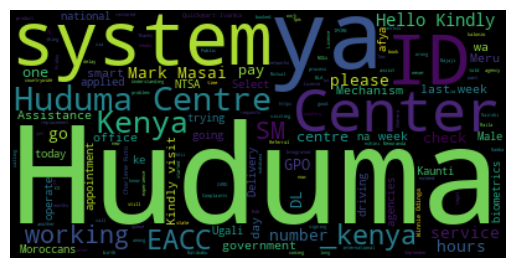

In [ ]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,9,9,9,9
neutral,19,19,19,19
positive,26,26,26,26


<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

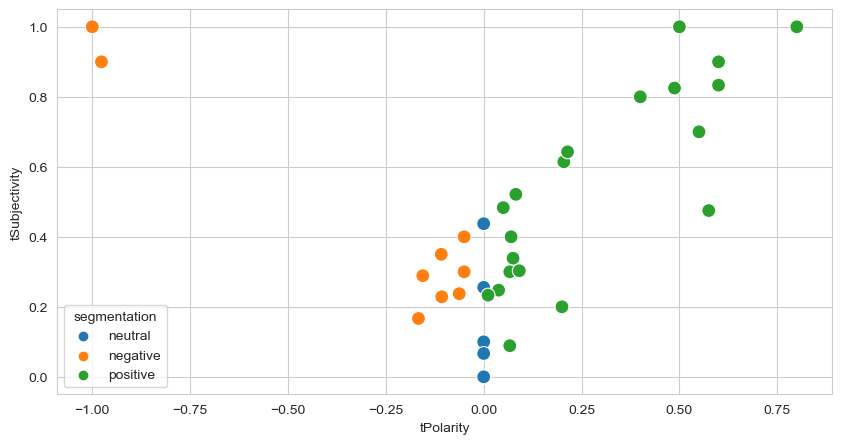

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

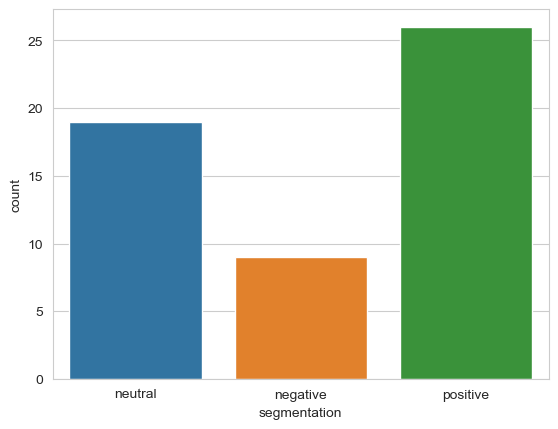

In [ ]:
sns.countplot(data=df,x='segmentation')

In [ ]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)


,resp,pct
0,mayWin,48.1
1,mayLoose,16.7
2,notSure,35.2
